In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


In [2]:
# Load the data and store it in dataframe df:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(file_path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Create the linear regression object:

In [3]:
lm = LinearRegression()
lm

LinearRegression()

In [4]:
X = df[['highway-mpg' ]] # predictor
y = df['price'] # target

#Fit the linear model using highway-mpg:

lm.fit(X,y)

LinearRegression()

In [5]:
# We can output a prediction:
y_hat = lm.predict(X)
y_hat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [6]:
# What is the value of the intercept (a)?

#lm.intercept_


round((lm.intercept_), 2)

38423.31

In [7]:
# What is the value of the slope (b)?
lm.coef_

array([-821.73337832])

#### Question #1 a): 
Create a linear regression object called "lm1".



In [8]:
lm1 = LinearRegression()
lm1

LinearRegression()

#### Question #1 b): 
Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [9]:
X = df[["engine-size"]]
y = df["price"]

lm1.fit(X,y)
#y_hat1 = lm1.predict(X)
#y_hat1[0:5]

LinearRegression()

In [10]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

#### Question #1 c):
Find the slope and intercept of the model.

In [11]:

# slope
slope= lm1.coef_
print(slope)

[[166.86001569]]


In [12]:
# Intercept
intercept= lm1.intercept_
print(intercept)

[-7963.33890628]


#### Question #1 d): 
What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [13]:
# using X and Y
# y_hat1 = a + bX
y_hat1= -7963.34 + 166.86*X

Price = -7963.34 + 166.86*df['engine-size']


### 1. Multiple Linear Regression
##### What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

From the previous section we know that other good predictors of price could be:

- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg
  
Let's develop a model using these variables as the predictor variables.

In [14]:
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

lm3 = LinearRegression()
#Fit the linear model using the four above-mentioned variables.
lm3.fit(Z, df["price"])

LinearRegression()

In [15]:
# What is the value of the intercept(a)?
lm3.intercept_

-15806.624626329201

In [16]:
# What are the values of the coefficients (b1, b2, b3, b4)?
lm3.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

#### Question #2 a): 
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [17]:
# Predictors
X = df[["normalized-losses", "highway-mpg"]]
#target
y = df["price"]

lm4 = LinearRegression()

# Fit the linear model
lm4.fit(X,y)

LinearRegression()

In [18]:
# Question #2 b): 
# Find the coefficient of the model.

lm4.coef_

array([   1.49789586, -820.45434016])

### 2. Model Evaluation Using Visualization
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

Import the visualization package, seaborn:

(0.0, 48185.38917546081)

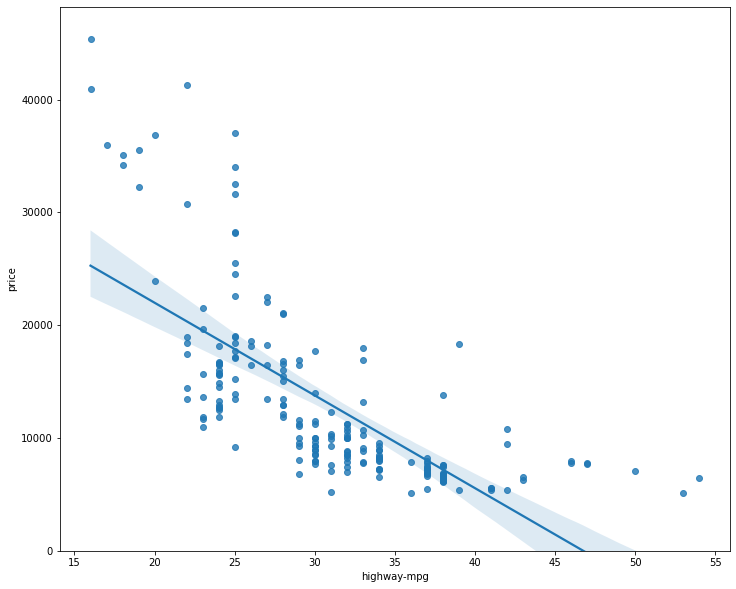

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

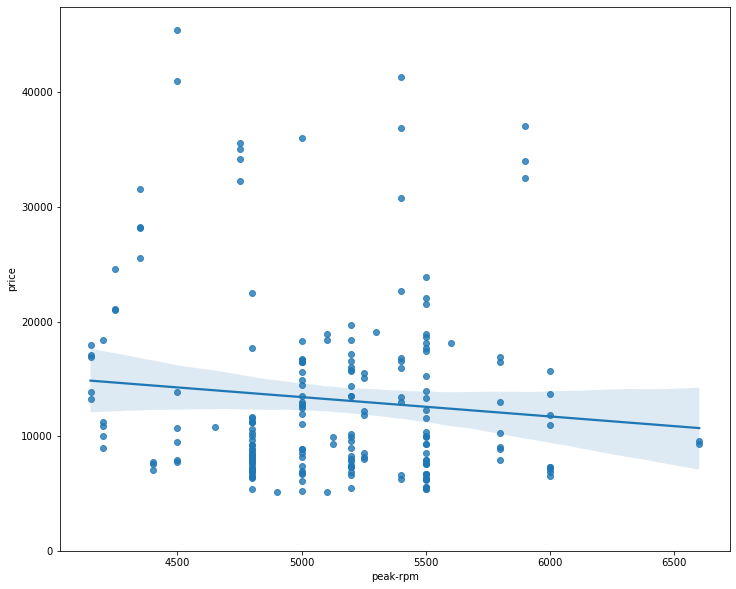

In [20]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y ="price", data=df)
plt.ylim(0,)

### Question #3:¶
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [21]:
df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


c:\Users\nakhu\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


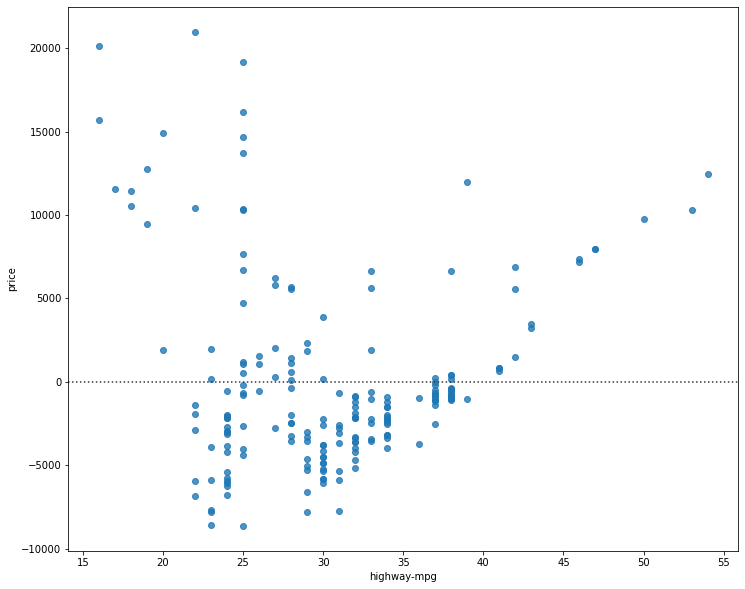

In [22]:
# Residual Plot

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [23]:
#  distribution plot
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y= df["price"]

lm = LinearRegression()

lm.fit(Z,y)


LinearRegression()

c:\Users\nakhu\anaconda3\envs\DataScience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\nakhu\anaconda3\envs\DataScience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


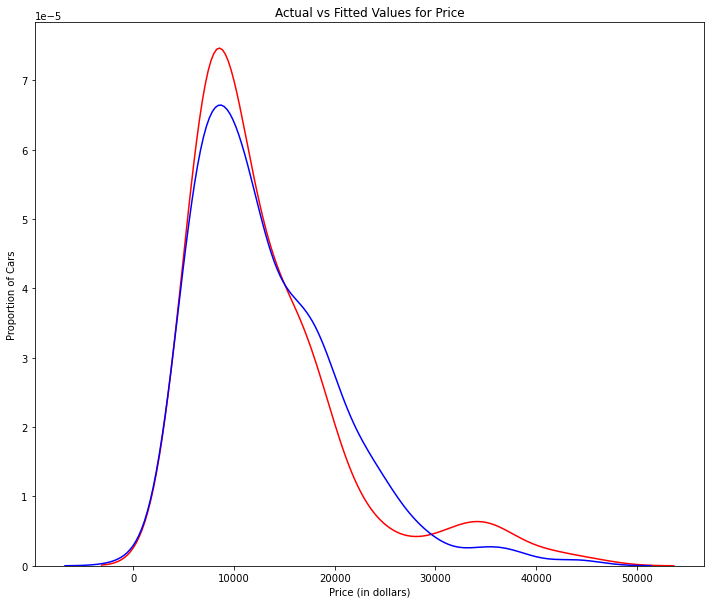

In [24]:


y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))

ax1= sns.distplot(y, hist = False, color= "r", label = "Actual Value")
sns.distplot(y_hat, hist = False, color= "b", label = "Fitted Values" , ax = ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()

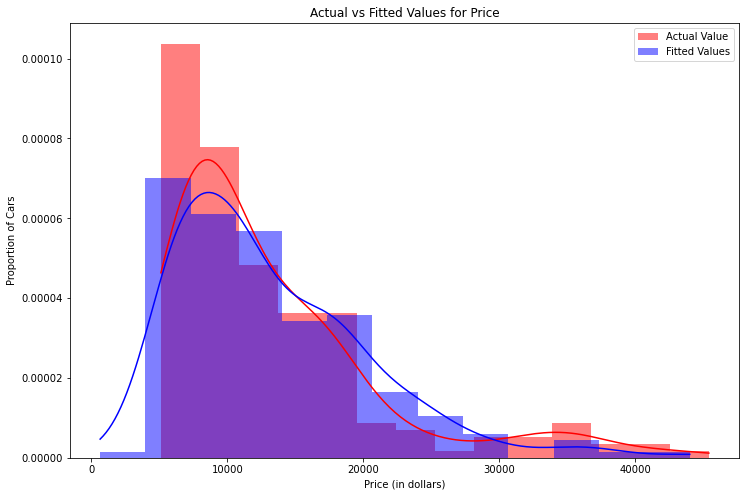

In [25]:
# Assuming lm is a fitted model and Z is your predictor dataset
y_hat = lm.predict(Z)

# Define your plot size
width, height = 12, 8
plt.figure(figsize=(width, height))

# Create a histogram with a density plot (KDE) for the actual values
ax1 = sns.histplot(y, kde=True, color="r",
                   label="Actual Value", stat="density", linewidth=0)

# Overlay the histogram with a density plot for the fitted values on the same axis
sns.histplot(y_hat, kde=True, color="b", label="Fitted Values",
             stat="density", linewidth=0, ax=ax1)

# Add titles and labels
plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")
plt.legend()  # Make sure to call plt.legend() to show the labels

plt.show()

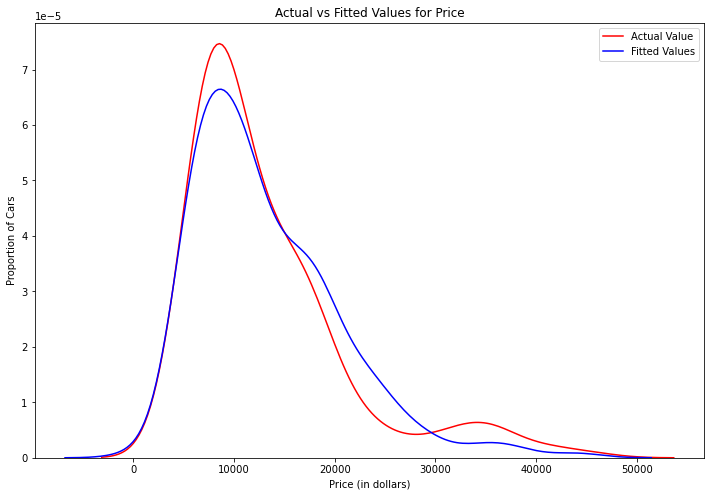

In [26]:
y_hat = lm.predict(Z)

# Define your plot size
width, height = 12, 8
plt.figure(figsize=(width, height))

# Create a KDE plot for the actual values
ax1 = sns.kdeplot(y, color="r", label="Actual Value")

# Overlay the KDE plot for the fitted values on the same axis
sns.kdeplot(y_hat, color="b", label="Fitted Values", ax=ax1)

# Add titles and labels
plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")
plt.legend()  # Make sure to call plt.legend() to show the labels

plt.show()

## 3. Polynomial Regression and Pipelines

In [27]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")

    plt.show()
    plt.close()

In [28]:
#Let's get the variables:
x = df["highway-mpg"]
y = df["price"]

# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

f = np.polyfit(x,y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


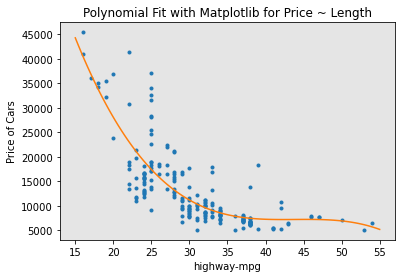

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [29]:
# Let's plot the function:
PlotPolly(p, x, y, "highway-mpg")
np.polyfit(x,y,3)

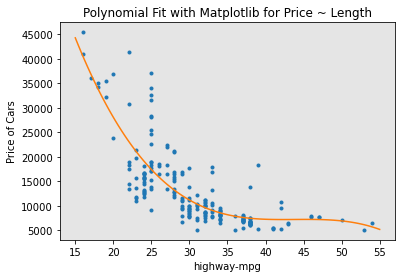

array([-1.24263344e-08,  4.72184712e-06, -8.02843172e-04,  8.05639989e-02,
       -5.29740772e+00,  2.39470233e+02, -7.58845429e+03,  1.68447183e+05,
       -2.56531043e+06,  2.55140510e+07, -1.49106897e+08,  3.87929906e+08])

In [30]:
PlotPolly(p, x, y, "highway-mpg")
np.polyfit(x,y,11)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


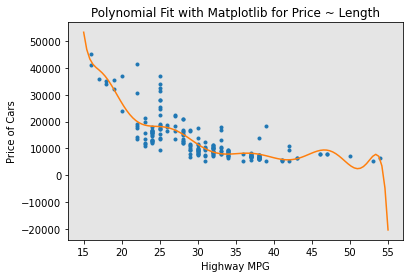

In [31]:
# Here we use a polynomial of the 11rd order (cubic)
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x,y, 'Highway MPG')

In [32]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [33]:
Z_pr = pr.fit_transform(Z)

In [34]:
#In the original data, there are 201 samples and 4 features.
Z.shape

(201, 4)

In [35]:
# After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

#### Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [37]:
Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias= False)),
         ("model", LinearRegression())]

#We input the list as an argument to the pipeline constructor:

pipe = Pipeline(Input)  
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [38]:
# convert the data type Z to type float to avoid conversion warnings that 
# may appear as a result of StandardScaler taking float inputs.

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [39]:
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe =pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [40]:
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
Input = [('scale', StandardScaler()), ('model', LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(Z, y)

ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### 4. Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).